<a href="https://colab.research.google.com/github/mishrapawan-cse/Python/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install opencv-python

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL.Image
import io
import base64

def capture_frame():
    js = Javascript('''
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg');
    }
    takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    img = PIL.Image.open(binary)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

📸 Ready to capture frame (Click the button in output)...


<IPython.core.display.Javascript object>

👥 Faces detected: 2


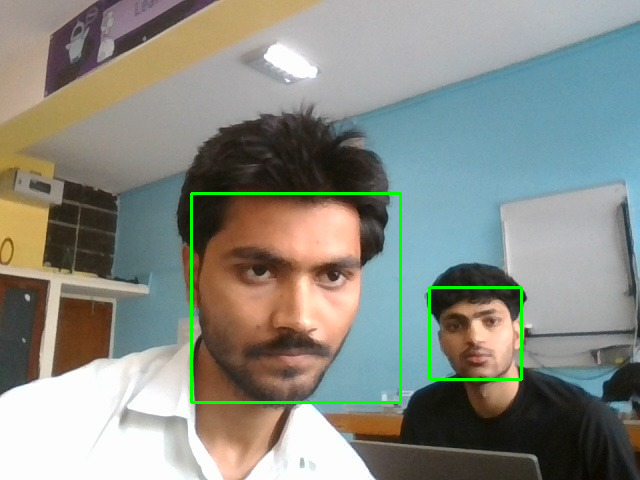

KeyboardInterrupt: Interrupted by user

In [16]:
from google.colab.patches import cv2_imshow
from time import sleep

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    print("📸 Ready to capture frame (Click the button in output)...")
    frame = capture_frame()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print(f"👥 Faces detected: {len(faces)}")
    cv2_imshow(frame)

    # Ask if user wants to continue
    cont = input("▶️ Press [Enter] to capture again, or type 'q' to quit: ")
    if cont.lower() == 'q':
        break